## Loading packages and data

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import re
!pip install missingno
import missingno as msno
from google.colab import files
!pip install xlrd
import xlrd
!pip install pandas_profiling
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

  Running setup.py bdist_wheel for missingno ... - done
  Stored in directory: /content/.cache/pip/wheels/39/fd/37/c8746c0f6f478363050f64f5fd179b4c4e16170410b34aa9f2
Successfully built missingno


/usr/local/lib/python2.7/dist-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 657, in launch_instance
    app.initialize(argv)
  File "<decorator-gen-121>", line 2, in initialize
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 87, in ca

In [0]:
data = files.urllib.request.urlretrieve('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls', filename=None)[0]
df = pd.read_excel(data, encoding = 'utf-8')

## EDA

In [3]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
df.embarked.unique()

array([u'S', u'C', nan, u'Q'], dtype=object)

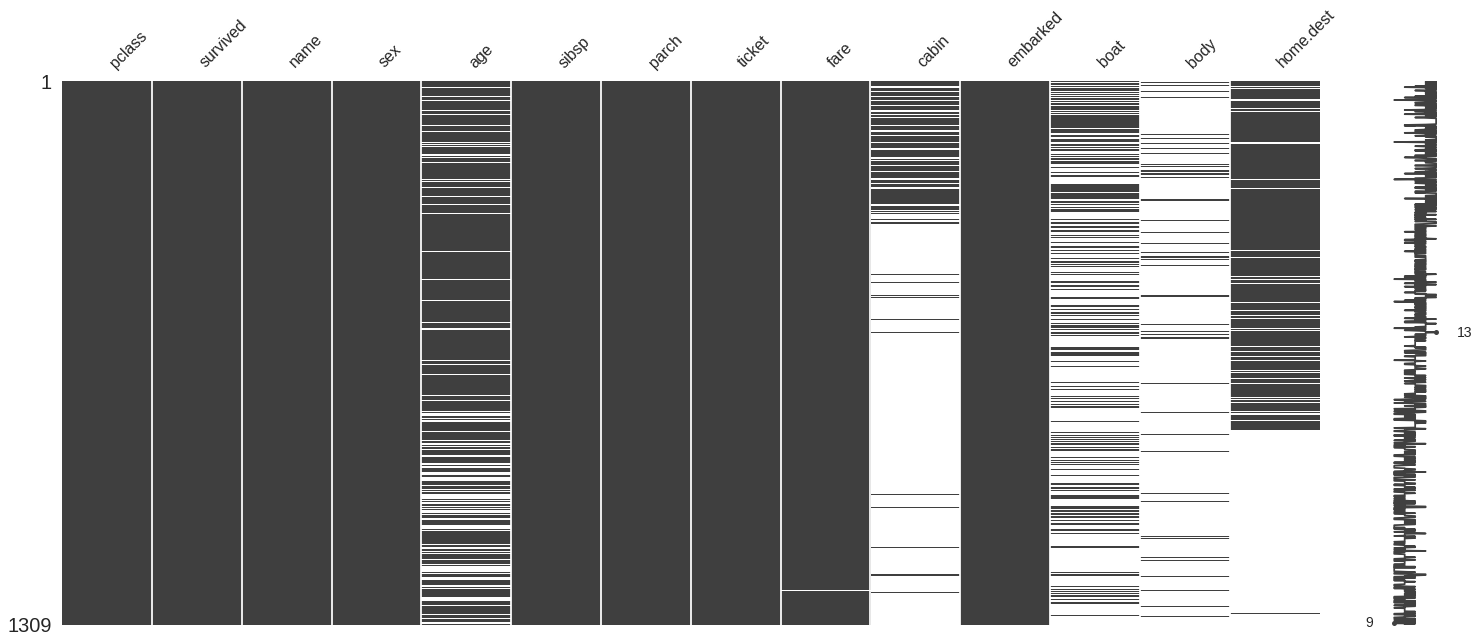

In [0]:
msno.matrix(df)
plt.show()

So, nans that presented in features body and cabin seem to be omitted by droping this features. For other features with nans let's take a look a bit closer.

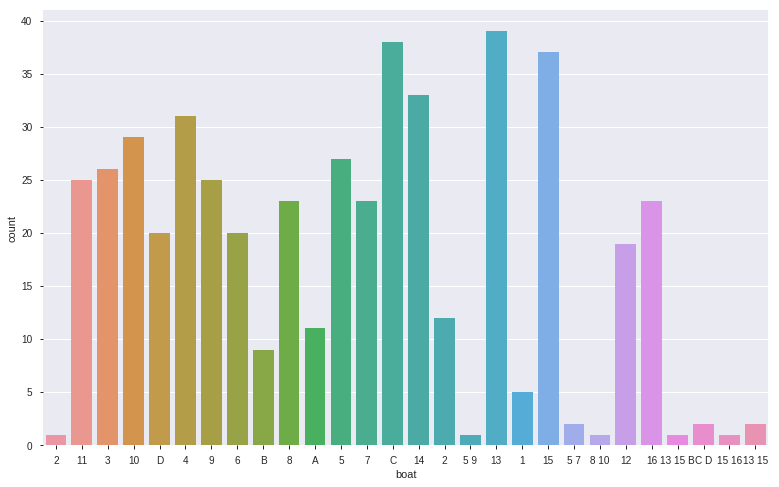

In [0]:
plt.figure(figsize=(13, 8))
sns.countplot(df.boat)
plt.show()

Feature boat has very big range of classes therefore it would be unfair to impute them by mode

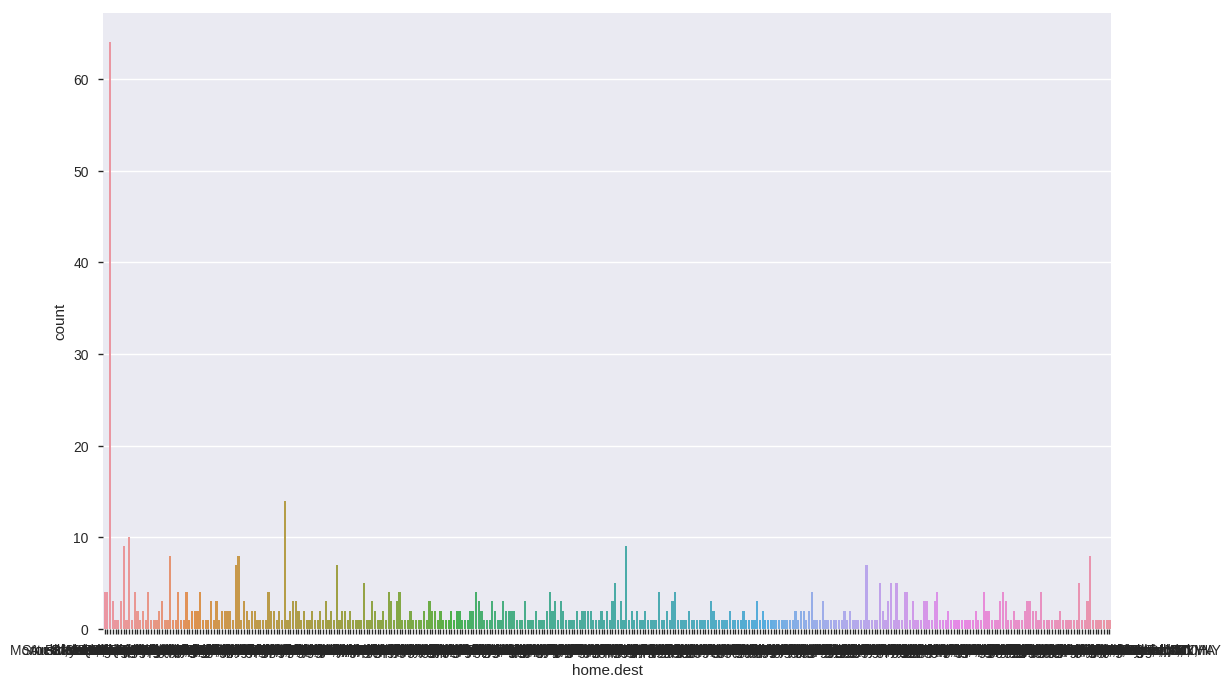

In [0]:
plt.figure(figsize=(13, 8))
sns.countplot(df['home.dest'])
plt.show()

In [0]:
df['home.dest']

0                             St Louis, MO
1          Montreal, PQ / Chesterville, ON
2          Montreal, PQ / Chesterville, ON
3          Montreal, PQ / Chesterville, ON
4          Montreal, PQ / Chesterville, ON
5                             New York, NY
6                               Hudson, NY
7                              Belfast, NI
8                      Bayside, Queens, NY
9                      Montevideo, Uruguay
10                            New York, NY
11                            New York, NY
12                           Paris, France
13                                     NaN
14                           Hessle, Yorks
15                            New York, NY
16                            Montreal, PQ
17                            Montreal, PQ
18                                     NaN
19                            Winnipeg, MN
20                            New York, NY
21                            New York, NY
22                            New York, NY
23         

The same thing we see in this feature and probably it'd be better to omit it.

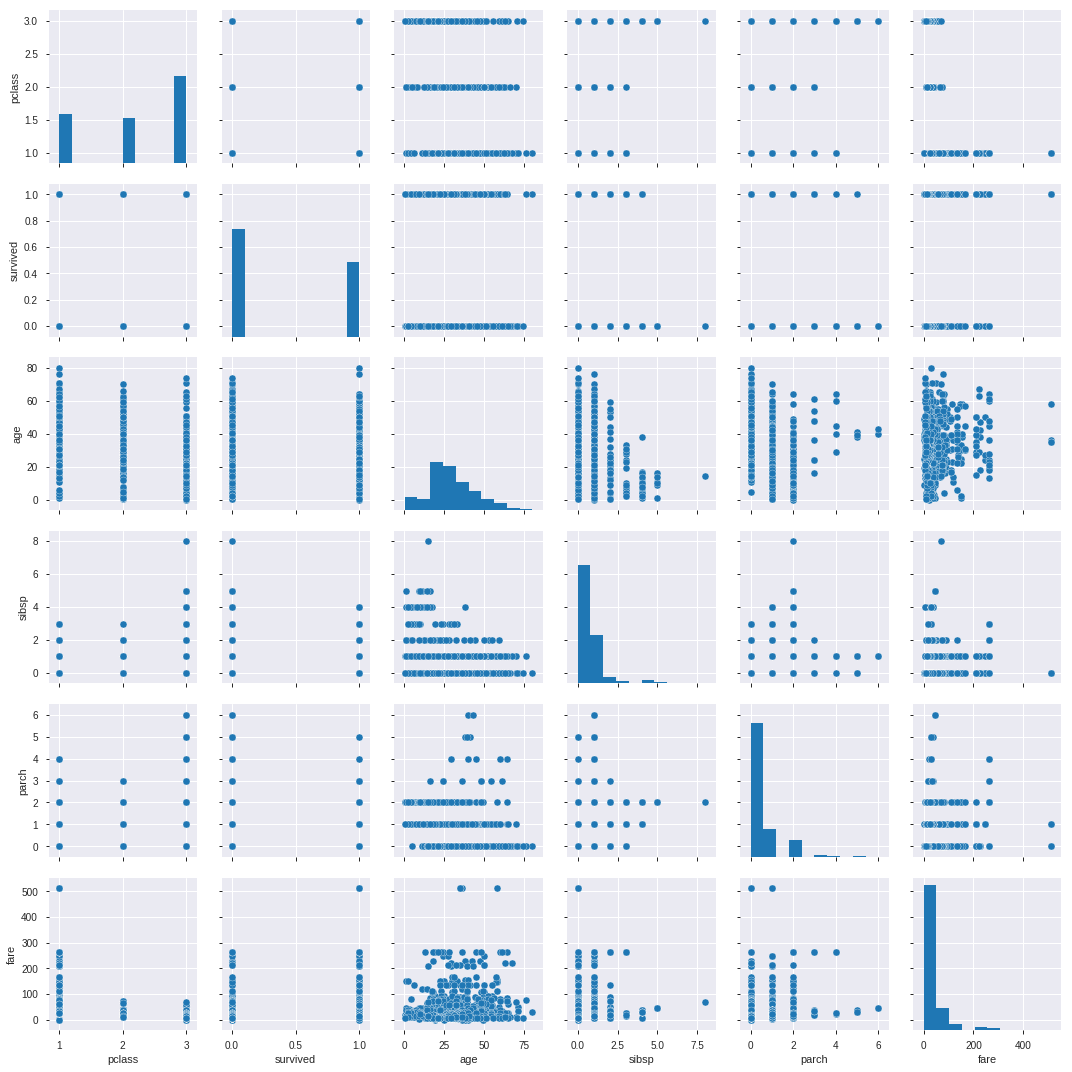

In [0]:
sns.pairplot(df.drop(columns=['cabin', 'boat', 'body', 'home.dest']).dropna())

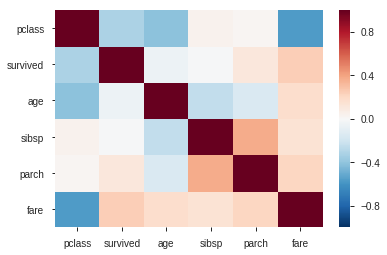

In [0]:
sns.heatmap(df.drop(columns=['cabin', 'boat', 'body', 'home.dest']).dropna().corr())

In [0]:
df.ticket

0                  24160
1                 113781
2                 113781
3                 113781
4                 113781
5                  19952
6                  13502
7                 112050
8                  11769
9               PC 17609
10              PC 17757
11              PC 17757
12              PC 17477
13                 19877
14                 27042
15              PC 17318
16              PC 17558
17              PC 17558
18                 11813
19                 13050
20                 11751
21                 11751
22                111369
23              PC 17757
24              PC 17483
25                 13905
26                 11967
27                 11967
28              PC 17760
29                110564
              ...       
1279              350406
1280              349252
1281              345767
1282              359309
1283          C.A. 49867
1284    SOTON/OQ 3101316
1285              345775
1286                2688
1287              347064


In [0]:
df.ticket.str.replace('\d+', '').replace([np.nan, ''], 'simple').unique()

array(['simple', u'PC ', u'W.E.P. ', u'WE/P ', u'F.C. ', u'P/PP ',
       u'C.A. ', u'C.A./SOTON ', u'S.O.P. ', u'F.C.C. ', u'SC/AH ',
       u'W./C. ', u'S.O.C. ', u'SC/PARIS ', u'S.W./PP ', u'W/C ',
       u'SCO/W ', u'SO/C ', u'SC/AH Basle ', u'SC/Paris ', u'SC ',
       u'S.O./P.P. ', u'S.C./PARIS ', u'SC/A. ', u'SW/PP ', u'CA ',
       u'SOTON/O ', u'C ', u'SOTON/O.Q. ', u'A/ ', u'PP ', u'A./. ',
       u'A/. ', u'SOTON/OQ ', u'S.P. ', u'SC/A ', u'AQ/. ', u'STON/O. ',
       u'A. . ', u'LINE', u'STON/O . ', u'AQ/ ', u'A/S ', u'A.. ', u'A. ',
       u'Fa ', u'S.C./A.. ', u'LP ', u'CA. ', u'STON/OQ. '], dtype=object)